In [1]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

In [2]:
df = pd.read_csv('~/nflplaybyplay2009to2016/NFL Play by Play 2009-2018 (v5).csv')
# df = pd.read_excel('~/data/play_by_play_2009_2018_clean.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [4]:
df.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [5]:
# df[["posteam","posteam_score","defteam_score","score_differential"]]

In [6]:
for i in range(int(df.shape[1]/10) + 1):
    print(df.columns[i*10:10*(i+1)])

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
       'game_date'],
      dtype='object')
Index(['quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp',
       'qtr', 'down', 'goal_to_go'],
      dtype='object')
Index(['time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type',
       'yards_gained', 'shotgun', 'no_huddle', 'qb_dropback'],
      dtype='object')
Index(['qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location',
       'air_yards', 'yards_after_catch', 'run_location', 'run_gap',
       'field_goal_result'],
      dtype='object')
Index(['kick_distance', 'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'posteam_timeouts_remaining',
       'defteam_timeouts_remaining'],
      dtype='object')
Index(['tota

In [7]:
#limit to only pass and run plays
# cols = ['home_team','away_team','posteam','posteam_type', 'defteam', 'side_of_field', 'yardline_100',
#        'quarter_seconds_remaining', 'half_seconds_remaining',
#        'game_seconds_remaining', 'game_half','down','ydstogo','time', 'shotgun', 'qb_dropback']

cols = ['down',
        'no_huddle',
        'goal_to_go',
        'sp',
        'defteam_score',
        'half_seconds_remaining',
        'quarter_seconds_remaining',
        'posteam_timeouts_remaining',
        'score_differential',
        'posteam_score',
        'game_seconds_remaining',
        'ydstogo']
y = 'play_type'
pass_run = df[(df.play_type == "run" )| (df.play_type == "pass")]
pass_run = pass_run[~pass_run.down.isna()]
# pass_run = pass_run[cols]


# cats = ["play_type","posteam_type","game_half","down"]
X = pass_run[cols].fillna(0)
Y = pass_run[[y]]

In [12]:
enc = OneHotEncoder(handle_unknown='ignore')
enc = enc.fit(X[X.columns[0:2]])

#https://stackoverflow.com/questions/58185671/how-to-save-one-hot-encoder
from joblib import dump, load
dump(enc, 'encoder.joblib') # save the encoder

['encoder.joblib']

In [13]:
X_enc = enc.transform(X[X.columns[0:2]])
X_enc= X_enc.toarray()
X_cont = np.array(pass_run[[col for col in X.columns if col not in X.columns[0:2]]])
X_cont.shape
X_p = np.concatenate([X_cont,X_enc[:,2::]],axis=1)
X_p[np.where(np.isnan(X_p))] = 0

(318691, 10)

In [12]:
enc.categories_

[array([1., 2., 3., 4.]), array([0, 1])]

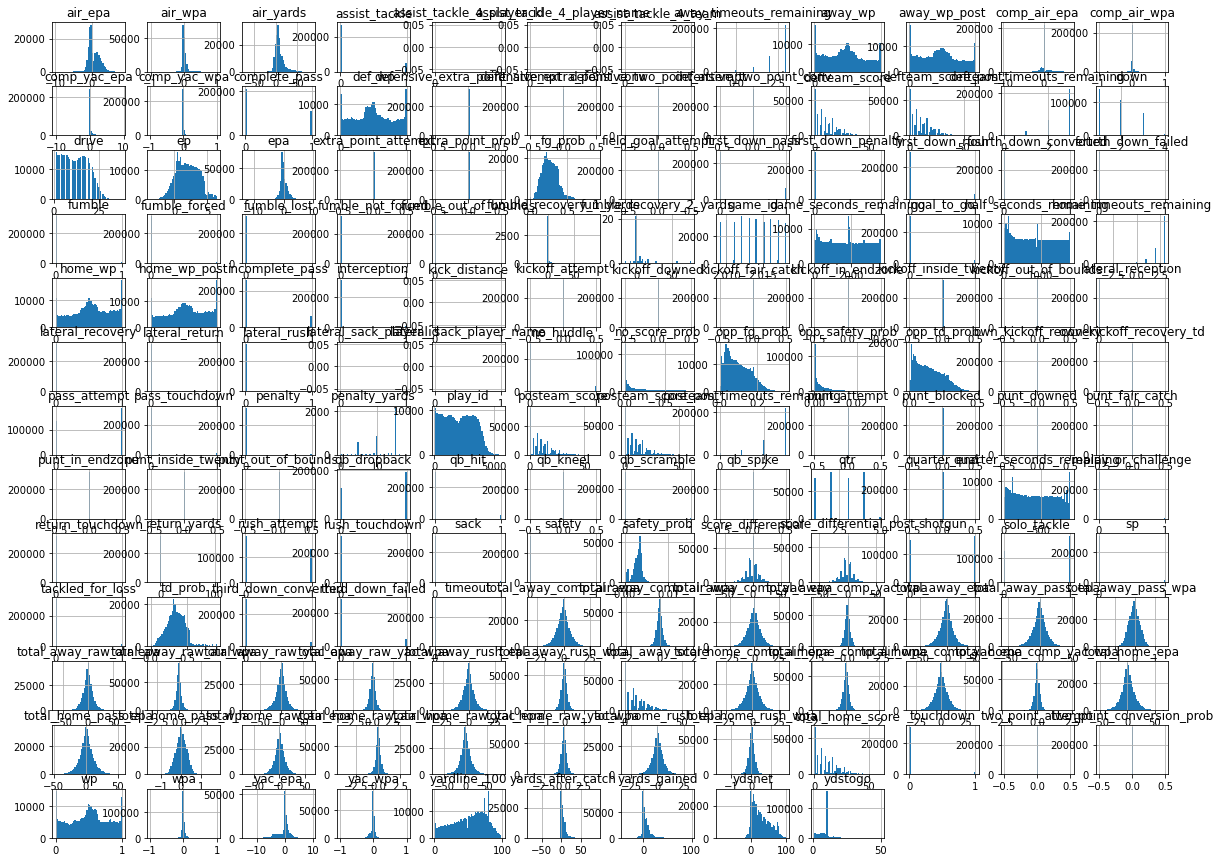

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
pass_run.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(X_p, Y, random_state = 0)

In [16]:
dt = DecisionTreeClassifier(min_samples_leaf = int(len(train_X)/20))
dt.fit(train_X,train_Y)

DecisionTreeClassifier(min_samples_leaf=11950)

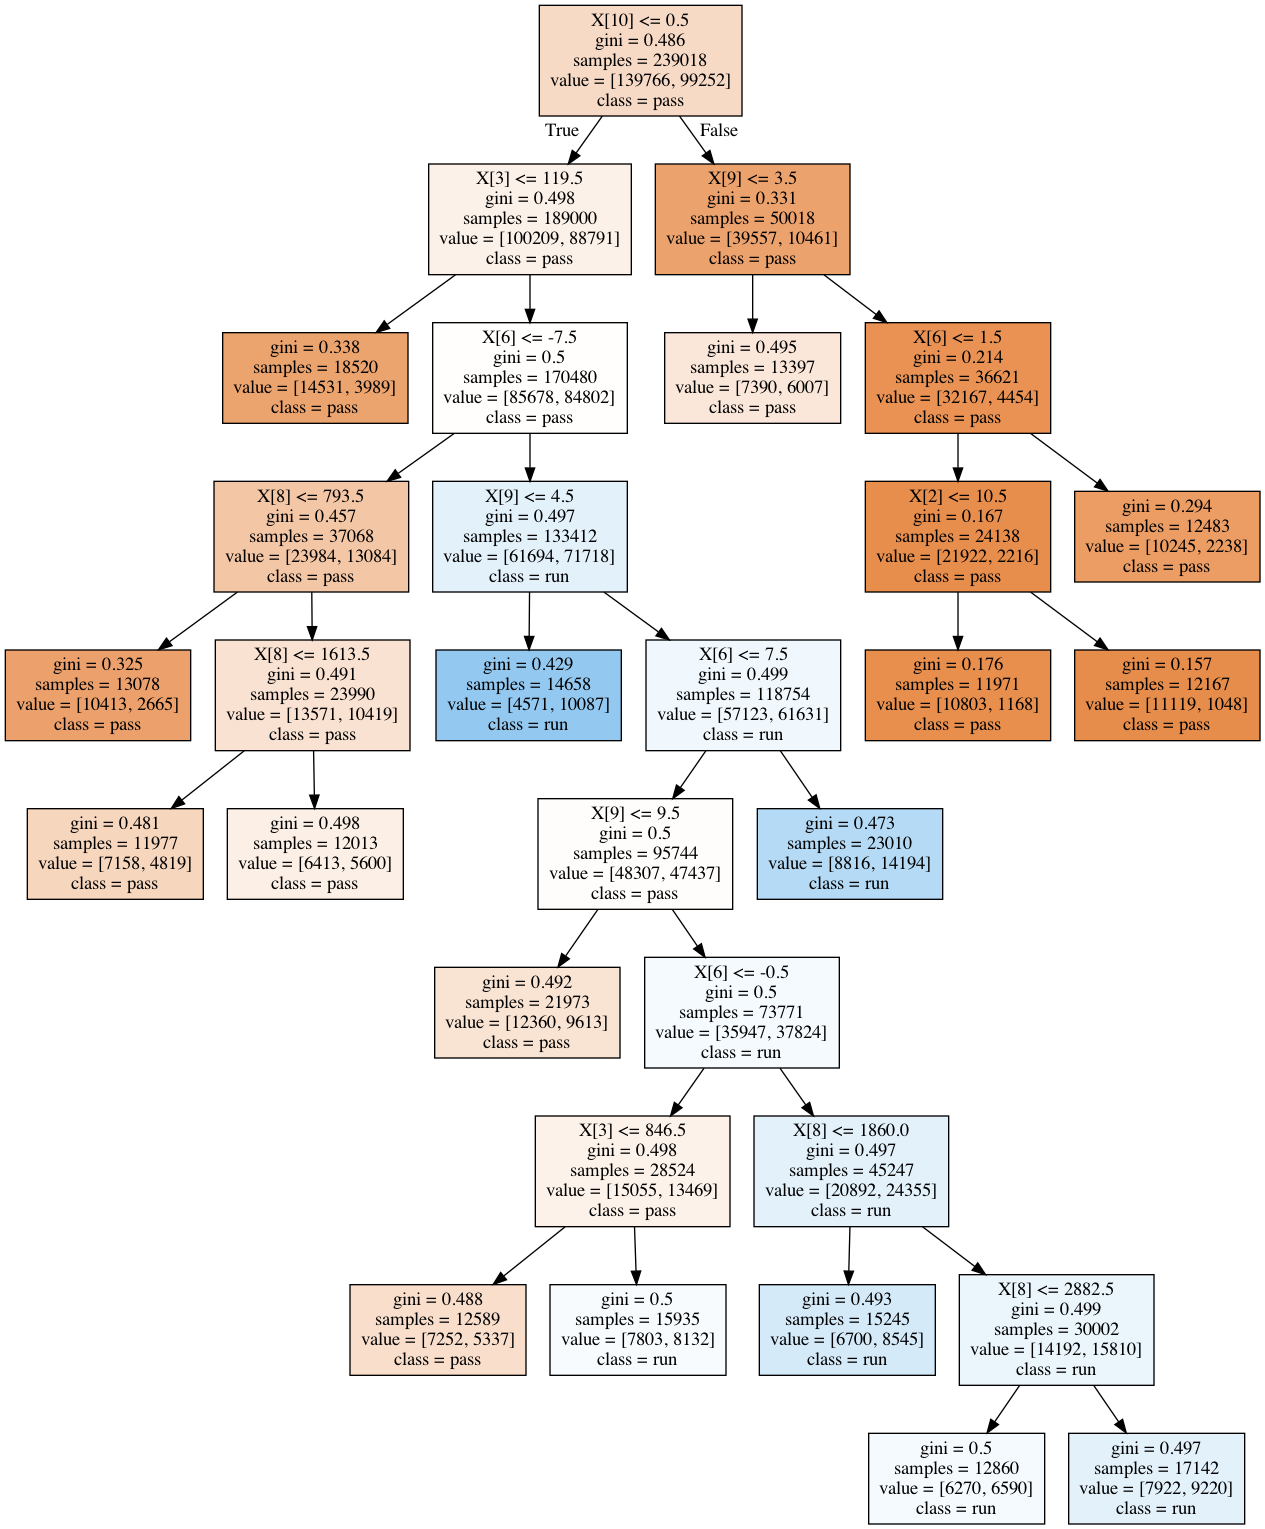

In [17]:
import pydotplus
from IPython.display import Image

# dt_feature_names = list(x.columns)
# dt_target_names = [cal for col in cols if col ~= "play_type"]
# export_graphviz(dt, out_file='tree.dot', 
#     feature_names=dt_feature_names, class_names=dt_target_names,
#     filled=True)  
export_graphviz(dt,out_file='tree.dot',class_names = ["pass","run"], filled = True)
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [18]:
accuracy_score(test_Y,dt.predict(test_X))

0.6508352892447881

In [19]:
tree_count = np.array(range(1,50))*10
rf_error = np.zeros(len(tree_count))
dt_error = np.ones(len(tree_count)) - accuracy_score(test_Y,dt.predict(test_X))

In [20]:
for i,trees in enumerate(tree_count):
    rf = RandomForestClassifier(min_samples_leaf = int(len(train_X)/20),n_estimators = trees)
    rf.fit(train_X,train_Y)
    rf_error[i] = 1 - accuracy_score(test_Y,rf.predict(test_X))

<ipython-input-20-1b4aa30dbbc2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X,train_Y)
<ipython-input-20-1b4aa30dbbc2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X,train_Y)
<ipython-input-20-1b4aa30dbbc2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X,train_Y)
<ipython-input-20-1b4aa30dbbc2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X,train_Y)
<ipython-input-20-1b4aa30dbbc2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(tree_count,rf_error*100,label = 'Random Forest Error')
plt.plot(tree_count,dt_error*100,label = 'CART Error')
plt.legend(loc='upper right',prop={'size': 18})
plt.xlabel("Tree Count",fontsize=18)
plt.ylabel("Error (%)",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(5,500)

In [ ]:
svm_clf = OneClassSVM(nu=.02,gamma='auto',shrinking=False)

#find all points that are non-spam, where the splam_class = 0 to train our one class svm
pass_x = train_X[np.where(train_Y == 0)]
svm_clf.fit(pass_x)

#We will need to relabel our test data to match that of our one-class SVM
one_class_y = test_Y.copy()
one_class_y[np.where(test_Y == 0)] = -1
one_class_y = one_class_y*(-1)
svm_prediction = svm_clf.predict(test_X)
error_rate = round((1 - accuracy_score(np.array(one_class_y),svm_prediction))*100,1)
print("The misclassification (or error) rate for the One Class SVM classifier is %s percent" % error_rate)

In [ ]:
#train and predict with the K-Nearest Neighbors classifier

nbrs = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree').fit(train_X,train_Y)
knn_predictions = nbrs.predict(test_X)

#train and predict with the Neural Network Classifier

nnclf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,10), random_state = 1,max_iter = 2000)
nnclf.fit(train_X,train_Y)
nn_predictions = nnclf.predict(test_X)

#train and predict with the Logistic Regression Classifier

logit = LogisticRegression(multi_class = 'ovr',solver = 'sag',max_iter = 1000)
logit.fit(train_X,train_Y)
logit_predictions = logit.predict(test_X)

#train and predict with the Support Vector Machine Classifier

svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(train_X,train_Y)
svm_predictions = svm_clf.predict(test_X)

#train and predict with the Kernel Support Vector Machine Classifier

m = train_X[np.random.choice(range(len(train_X)),1000,replace=False)]
norm_2 = np.array([])
for i in range(len(m)):
    for j in range(i,len(m)):
          norm_2 = np.append(norm_2,np.linalg.norm(train_X[i]-train_X[j]))
            
M = np.median(np.square(norm_2))
sigma = (M/2)**.5

rbf_clf = svm.SVC(kernel='rbf', decision_function_shape='ovo',gamma=1/(2*sigma**2))
rbf_clf.fit(train_X,train_Y)
rbf_predictions = rbf_clf.predict(test_X)



In [ ]:
for i in [0,1]:
    print("Precision for label %s:" % i ,precision_score(test_Y[np.where(test_Y == i)[0]],knn_predictions[np.where(test_Y == i)[0]],average='micro'))
    print("F1 Score for label %s:" % i,f1_score(test_Y[np.where(test_Y == i)[0]],knn_predictions[np.where(test_Y == i)[0]], average='micro'))
    print("Recall Score for label %s:" % i,recall_score(test_Y[np.where(test_Y == i)[0]],knn_predictions[np.where(test_Y == i)[0]],average='micro'),"\n")

print("Confusion Matrix:\n",confusion_matrix(test_Y,knn_predictions),"\n")

print("Precision:",precision_score(test_Y[np.where(test_Y == 2)[0]],knn_predictions[np.where(test_Y == 2)[0]],average='weighted'))

#### Metrics for Neural Network Classifier

for i in [0,1]:
    print("Precision for label %s:" % i ,precision_score(test_Y[np.where(test_Y == i)[0]],nn_predictions[np.where(test_Y == i)[0]],average='micro'))
    print("F1 Score for label %s:" % i,f1_score(test_Y[np.where(test_Y == i)[0]],nn_predictions[np.where(test_Y == i)[0]], average='micro'))
    print("Recall Score for label %s:" % i,recall_score(test_Y[np.where(test_Y == i)[0]],nn_predictions[np.where(test_Y == i)[0]],average='micro'),"\n")
print("Confusion Matrix:\n", confusion_matrix(test_Y,nn_predictions),"\n")

#### Metrics for Logistic Regression Classifier

for i in [0,1]:
    print("Precision for label %s:" % i ,precision_score(test_Y[np.where(test_Y == i)[0]],logit_predictions[np.where(test_Y == i)[0]],average='micro'))
    print("F1 Score for label %s:" % i,f1_score(test_Y[np.where(test_Y == i)[0]],logit_predictions[np.where(test_Y == i)[0]], average='micro'))
    print("Recall Score for label %s:" % i,recall_score(test_Y[np.where(test_Y == i)[0]],logit_predictions[np.where(test_Y == i)[0]],average='micro'),"\n")
print("Confusion Matrix:\n", confusion_matrix(test_Y,logit_predictions),"\n")

#### Metrics for Support Vector Machine Classifier

for i in [0,1]:
    print("Precision for label %s:" % i ,precision_score(test_Y[np.where(test_Y == i)[0]],svm_predictions[np.where(test_Y == i)[0]],average='micro'))
    print("F1 Score for label %s:" % i,f1_score(test_Y[np.where(test_Y == i)[0]],svm_predictions[np.where(test_Y == i)[0]], average='micro'))
    print("Recall Score for label %s:" % i,recall_score(test_Y[np.where(test_Y == i)[0]],svm_predictions[np.where(test_Y == i)[0]],average='micro'),"\n")
print("Confusion Matrix:\n", confusion_matrix(test_Y,svm_predictions),"\n")

#### Metrics for Kernel Support Vector Machine Classifier

for i in [0,1]:
    print("Precision for label %s:" % i ,precision_score(test_Y[np.where(test_Y == i)[0]],rbf_predictions[np.where(test_Y == i)[0]],average='micro'))
    print("F1 Score for label %s:" % i,f1_score(test_Y[np.where(test_Y == i)[0]],rbf_predictions[np.where(test_Y == i)[0]], average='micro'))
    print("Recall Score for label %s:" % i,recall_score(test_Y[np.where(test_Y == i)[0]],rbf_predictions[np.where(test_Y == i)[0]],average='micro'),"\n")
print("Confusion Matrix:\n", confusion_matrix(test_Y,rbf_predictions),"\n")

In [23]:
#Saving to pickle files as per: https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump
dump(dt, 'clf.joblib') 
dump(nbrs, 'knn.joblib')
dump(nnclf, 'nn.joblib')
dump(logit, 'logit.joblib')
dump(svm_clf, 'svm.joblib')
dump(rbf_clf, 'rbf.joblib')

['rbf.joblib']

In [22]:
import os
os.getcwd()

'/Users/diego/Documents/team_project/backend_src/notebooks'